In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import *
from sklearn.preprocessing import scale
import numpy as np
import math
from time import time
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wdbc.data.txt",sep=",",header=None)

In [3]:
def df_splitor(data):
    df_M=data.loc[(data[1]=="M")]
    df_B=data.loc[(data[1]=="B")]
    df_M_train, df_M_test,= train_test_split(df_M, test_size=0.2)
    df_B_train, df_B_test,= train_test_split(df_B, test_size=0.2)
    df_train=pd.concat([df_M_train,df_B_train],axis=0)
    df_test=pd.concat([df_M_test,df_B_test],axis=0)
    return df_train,df_test

In [4]:
def x_y_split(data):
    columns = data.columns.tolist() # get the columns
    x_col = columns[2:]
    y_col = columns[1]
    X = data[x_col]
    Y = data[y_col]
    return X,Y

In [5]:
def trans_to_dig(data):
    data=data.map({"B":1,"M":0})
    return data

# b i:

In [11]:
def L1_penalized_SVM(data):
    parameters = {"C": [math.exp(i) for i in range(-5,5)]}
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        train,test=df_splitor(data)
        X_train,Y_train = x_y_split(train)
        X_train = scale(X_train)
        Y_train=trans_to_dig(Y_train)
        X_test,Y_test= x_y_split(test)
        X_test = scale(X_test)
        Y_test=trans_to_dig(Y_test)
        svc = LinearSVC(penalty="l1",dual=False,random_state=42 )
        clf = GridSearchCV(svc, parameters, cv=5)
        clf.fit(X_train, Y_train)
        svc = clf.best_estimator_
        train_pre=clf.predict(X_train)
        test_pre= clf.predict(X_test)
        loa.append(accuracy_score(y_true=Y_train,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            fpr, tpr, thresholds = roc_curve(Y_train, clf.decision_function(X_train))
            logit_roc_auc = roc_auc_score(Y_train, clf.predict(X_train))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            fpr, tpr, thresholds = roc_curve(Y_test, clf.decision_function(X_test))
            logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result

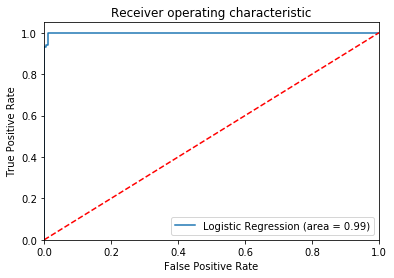

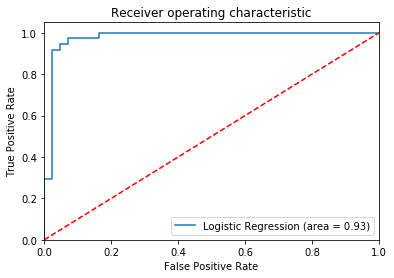

,Average Accuracy,Average F1-Score,Average Precision,Average Recall,Average AUC
Train,0.985536,0.988570,0.981594,0.995673,0.982057
Test,0.971014,0.977065,0.970695,0.983796,0.966704


In [12]:
result=L1_penalized_SVM(data=df)
display(result)

In [99]:
train,test=df_splitor(df)
# split labeled and unlabeled data
label,unlable=train_test_split(train,test_size=0.5)
# preprocessing for labeled data
X_train_label,Y_train_label = x_y_split(label)
col_name=X_train_label.columns.tolist()
X_train_label = scale(X_train_label)
Y_train_label=trans_to_dig(Y_train_label)
# preprocessing for unlabeled data
X_train_unlabel,Y_train_unlabel=x_y_split(unlable)
X_train_unlabel=X_train_unlabel.reset_index(drop=True)
X_train_unlabel = scale(X_train_unlabel)
Y_train_unlabel=trans_to_dig(Y_train_unlabel)
Y_train_unlabel=Y_train_unlabel.reset_index(drop=True)
# preprocessing for test data
X_test,Y_test= x_y_split(test)
X_test = scale(X_test)
Y_test=trans_to_dig(Y_test)
while len(X_train_unlabel)>0:
    # construct classifier
    svc = LinearSVC(penalty="l1",dual=False,random_state=42)
    parameters = {"C": [math.exp(i) for i in range(-5,5)]}
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(X_train_label, Y_train_label)
    unlabel_dis=clf.decision_function(X_train_unlabel)
    unlabel_pre=clf.predict(X_train_unlabel)
    unlabel_dis_abs=pd.DataFrame({"distance":abs(unlabel_dis),"prediction":unlabel_pre})
    sorted_distance=unlabel_dis_abs.sort_values(by="distance",ascending=False)
    farest=sorted_distance.first_valid_index()
    sorted_distance.loc[farest]["prediction"]
    X_train_label=np.append(X_train_label,[X_train_unlabel[farest]],axis=0)
    Y_train_label=Y_train_label.append(pd.Series(sorted_distance.loc[farest]["prediction"]),ignore_index=True)
    X_train_unlabel=np.delete(X_train_unlabel,farest,0)

226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [106]:
def L1_penalized_SVM_semi(data):
    parameters = {"C": [math.exp(i) for i in range(-5,5)]}
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        print(i)
        train,test=df_splitor(data)
        # split labeled and unlabeled data
        label,unlable=train_test_split(train,test_size=0.5)
        # preprocessing for labeled data
        X_train_label,Y_train_label = x_y_split(label)
        col_name=X_train_label.columns.tolist()
        X_train_label = scale(X_train_label)
        Y_train_label=trans_to_dig(Y_train_label)
        # preprocessing for unlabeled data
        X_train_unlabel,Y_train_unlabel=x_y_split(unlable)
        X_train_unlabel=X_train_unlabel.reset_index(drop=True)
        X_train_unlabel = scale(X_train_unlabel)
        Y_train_unlabel=trans_to_dig(Y_train_unlabel)
        Y_train_unlabel=Y_train_unlabel.reset_index(drop=True)
        # preprocessing for test data
        X_test,Y_test= x_y_split(test)
        X_test = scale(X_test)
        Y_test=trans_to_dig(Y_test)
        while len(X_train_unlabel)>0:
            # construct classifier
            svc = LinearSVC(penalty="l1",dual=False,random_state=42)
            parameters = {"C": [math.exp(i) for i in range(-5,5)]}
            clf = GridSearchCV(svc, parameters, cv=5)
            clf.fit(X_train_label, Y_train_label)
            unlabel_dis=clf.decision_function(X_train_unlabel)
            unlabel_pre=clf.predict(X_train_unlabel)
            unlabel_dis_abs=pd.DataFrame({"distance":abs(unlabel_dis),"prediction":unlabel_pre})
            sorted_distance=unlabel_dis_abs.sort_values(by="distance",ascending=False)
            farest=sorted_distance.first_valid_index()
            sorted_distance.loc[farest]["prediction"]
            X_train_label=np.append(X_train_label,[X_train_unlabel[farest]],axis=0)
            Y_train_label=Y_train_label.append(pd.Series(sorted_distance.loc[farest]["prediction"]),ignore_index=True)
            X_train_unlabel=np.delete(X_train_unlabel,farest,0)
        train_pre=clf.predict(X_train_label)
        test_pre= clf.predict(X_test)
        loa.append(accuracy_score(y_true=Y_train_label,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train_label,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train_label,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train_label,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train_label,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            fpr, tpr, thresholds = roc_curve(Y_train, clf.decision_function(X_train))
            logit_roc_auc = roc_auc_score(Y_train, clf.predict(X_train))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            fpr, tpr, thresholds = roc_curve(Y_test, clf.decision_function(X_test))
            logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result

In [ ]:
result=L1_penalized_SVM_semi(data=df)


0
1
2
3
4
5
6
7
8
9
